In [20]:
import os
import csv
import matplotlib.pyplot as plt
import math

In [21]:
def calc_first_order(a, g, x) :
    return list(g/a*(1- math.exp(-1*a*t)) for t in x)

def calc_second_order(a, g, x) :
    return list(math.sqrt(g/a)*math.tanh(math.sqrt(a*g)*t) for t in x)

In [22]:
def load_files(dir_name, variance=None, value=None) :
    times_list = []
    vys_list = []
    density_list = []

    files = os.listdir(dir_name)

    if variance and value :
        if variance == "MR" :
            files = list(filter( lambda x : float(x.split('_')[6])==float(value), files))
        elif variance == "T" :
            files = list(filter( lambda x : float(x.split('_')[4])==float(value), files))
        elif variance == "RR" :
            files = list(filter( lambda x : float(x.split('_')[5])==float(value), files))

    for file_name in files :
        with open(dir_name+'/'+file_name) as csvfile:
            times = []
            vys = []
            density = []
            spamreader = csv.reader(csvfile, delimiter=';')
            for i, row in enumerate(spamreader):
                if i > 0 and len(row) == 3:
                    try :
                        temp_t, temp_vy, temp_density = list(map(lambda x : float(x), row))
                        times.append(temp_t)
                        vys.append(temp_vy)
                        density.append(temp_density)
                    except :
                        print ("error", i, row)
                        break
            times_list.append(times)
            vys_list.append(vys)
            density_list.append(density)
    
    return times_list, vys_list, density_list

In [23]:
times_list, vys_list, density_list = load_files('result_T', 'T', 2000)

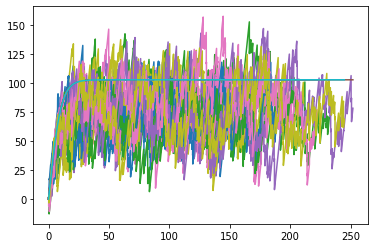

In [24]:
for times, vys in zip(times_list, vys_list) :
    plt.plot(times, vys)
#     plt.plot(times, calc_first_order(0.085, 10, times))
    plt.plot(times, calc_second_order(0.00095, 10, times)) 

In [25]:
# How to determining terminal velocity
terminal_vs = []
for times, vys in zip (times_list, vys_list) :
    if len(vys) > 0 :
        terminal_vs.append(sum(vys[-1000:])/1000)
terminal_v = sum(terminal_vs)/len(terminal_vs)
print("terminal velocity is {}".format(terminal_v) )

terminal velocity is 75.89330078499646


In [26]:
# How to set the determining 
def get_gamma_by_first_order(g, terminal_v) :
    return g/terminal_v

def get_gamma_by_second_order(g, terminal_v) :
    return g/(terminal_v**2)

In [27]:
g = 10
gamma_1 = get_gamma_by_first_order(g, terminal_v)
gamma_2 = get_gamma_by_second_order(g, terminal_v)
print("damping factor gamma in the first order situation : {}".format(gamma_1))
print("damping factor gamma in the second order situation : {}".format(gamma_2))

damping factor gamma in the first order situation : 0.1317639356381364
damping factor gamma in the second order situation : 0.0017361734734850952


Text(0, 0.5, 'average velocity (m/s)')

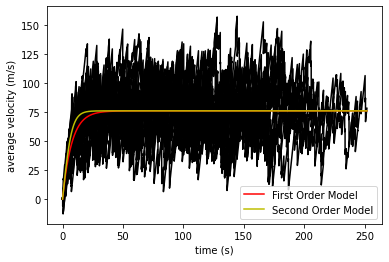

In [28]:
longest_times = []
for times, vys in zip(times_list, vys_list) :
    plt.plot(times, vys, 'k')
    if len(longest_times) < len(times) :
        longest_times = times
plt.plot(longest_times, calc_first_order(gamma_1, g, longest_times), 'r-', label='First Order Model')
plt.plot(longest_times, calc_second_order(gamma_2, g, longest_times), 'y-', label='Second Order Model')
plt.legend()
plt.xlabel("time (s)")
plt.ylabel("average velocity (m/s)")

In [29]:
import numpy as np
sqrt_error_first_order = 0.0
sqrt_error_second_order = 0.0
for times, vys in zip(times_list, vys_list) :    
    if len(times) > 0 :
        sqrt_error_first_order += np.sqrt(sum((np.array(vys) - np.array(calc_first_order(gamma_1, g, times)))**2)/len(times))
        sqrt_error_second_order += np.sqrt(sum((np.array(vys) - np.array(calc_second_order(gamma_2, g, times)))**2)/len(times)) 
    
print("The Mean Square Root Error of First Order Model : {}".format(sqrt_error_first_order/len(vys_list)))
print("The Mean Square Root Error of Second Order Model : {}".format(sqrt_error_second_order/len(vys_list)))
if sqrt_error_first_order < sqrt_error_second_order :
    print("The first order model is more fitter than the second order model")
else :
    print("The second order model is more fitter than the first order model")

The Mean Square Root Error of First Order Model : 20.907474198613137
The Mean Square Root Error of Second Order Model : 20.95541098960347
The first order model is more fitter than the second order model


# Organized Script

In [30]:
def calc_first_order(a, g, x) :
    return list(g/a*(1- math.exp(-1*a*t)) for t in x)

def calc_second_order(a, g, x) :
    return list(math.sqrt(g/a)*math.tanh(math.sqrt(a*g)*t) for t in x)

def load_files(dir_name, variance=None, value=None) :
    times_list = []
    vys_list = []
    density_list = []

    files = os.listdir(dir_name)

    if variance and value :
        if variance == "MR" :
            files = list(filter( lambda x : float(x.split('_')[6])==float(value), files))
        elif variance == "T" :
            files = list(filter( lambda x : float(x.split('_')[4])==float(value), files))
        elif variance == "RR" :
            files = list(filter( lambda x : float(x.split('_')[5])==float(value), files))

    for file_name in files :
        with open(dir_name+'/'+file_name) as csvfile:
            times = []
            vys = []
            density = []
            spamreader = csv.reader(csvfile, delimiter=';')
            for i, row in enumerate(spamreader):
                if i > 0 and len(row) == 3:
                    try :
                        temp_t, temp_vy, temp_density = list(map(lambda x : float(x), row))
                        times.append(temp_t)
                        vys.append(temp_vy)
                        density.append(temp_density)
                    except :
                        print ("error", i, row)
            times_list.append(times)
            vys_list.append(vys)
            density_list.append(density)
    
    return times_list, vys_list, density_list

# How to set the determining 
def get_gamma_by_first_order(g, terminal_v) :
    return g/terminal_v

def get_gamma_by_second_order(g, terminal_v) :
    return g/(terminal_v**2)

In [31]:
def compare_models(dir_name, variable, value) :

    times_list, vys_list, density_list = load_files(dir_name, variable, value)
    
    terminal_vs = []
    for times, vys in zip (times_list, vys_list) :
        if len(vys) > 0 :
            terminal_vs.append(sum(vys[-1000:])/1000)
    if len(terminal_vs) > 0 :
        terminal_v = sum(terminal_vs)/len(terminal_vs)

        g = 10
        gamma_1 = get_gamma_by_first_order(g, terminal_v)
        gamma_2 = get_gamma_by_second_order(g, terminal_v)
        print("damping factor gamma in the first order situation : {}".format(gamma_1))
        print("damping factor gamma in the second order situation : {}".format(gamma_2))

        sqrt_error_first_order = 0.0
        sqrt_error_second_order = 0.0
        for times, vys in zip(times_list, vys_list) :    
            if (len(times) > 0 ) :
                sqrt_error_first_order += np.sqrt(sum((np.array(vys) - np.array(calc_first_order(gamma_1, g, times)))**2)/len(times))
                sqrt_error_second_order += np.sqrt(sum((np.array(vys) - np.array(calc_second_order(gamma_2, g, times)))**2)/len(times)) 

        print("The Mean Square Root Error of First Order Model : {}".format(sqrt_error_first_order/len(vys_list)))
        print("The Mean Square Root Error of Second Order Model : {}".format(sqrt_error_second_order/len(vys_list)))
        if sqrt_error_first_order < sqrt_error_second_order :
            print("The first order model is more fitter than the second order model")
        else :
            print("The second order model is more fitter than the first order model")

        return [gamma_1, gamma_2, terminal_v]
    else :
        return [None, None, None]

## Temperature

500
damping factor gamma in the first order situation : 0.12451301138025686
damping factor gamma in the second order situation : 0.0015503490002979976
The Mean Square Root Error of First Order Model : 18.487680825683643
The Mean Square Root Error of Second Order Model : 18.2808978910081
The second order model is more fitter than the first order model
0.12451301138025686
0.0015503490002979976
600
damping factor gamma in the first order situation : 0.12480627555155031
damping factor gamma in the second order situation : 0.0015576606417049505
The Mean Square Root Error of First Order Model : 18.738674120766554
The Mean Square Root Error of Second Order Model : 18.58455620461332
The second order model is more fitter than the first order model
0.12480627555155031
0.0015576606417049505
700
damping factor gamma in the first order situation : 0.12083600430192254
damping factor gamma in the second order situation : 0.0014601339935654243
The Mean Square Root Error of First Order Model : 18.99956

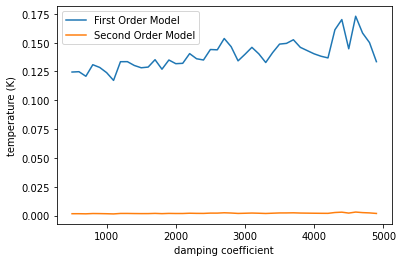

In [46]:
gamma1s = [] 
gamma2s = []
terminal_vs = []

Ts = list(range(500, 5000, 100))
for T in Ts :
    print(T)
    [g1, g2, terminal_v] = compare_models('result_T', 'T', T)
    print(g1)
    print(g2)
    gamma1s.append(g1)
    gamma2s.append(g2)
    terminal_vs.append(terminal_v)

plt.plot(Ts, gamma1s, label='First Order Model')
plt.plot(Ts, gamma2s, label='Second Order Model')
plt.legend()
plt.xlabel("damping coefficient")
plt.ylabel("temperature (K)")
plt.savefig("damping coefficient_Temperature.jpg")


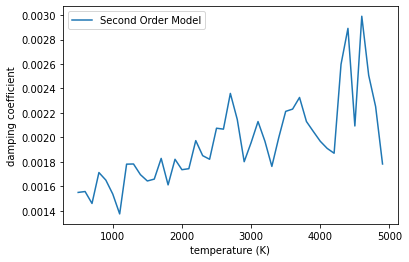

In [47]:
plt.plot(Ts, gamma2s, label='Second Order Model')
plt.legend()
plt.xlabel("temperature (K)")
plt.ylabel("damping coefficient")
plt.savefig("")

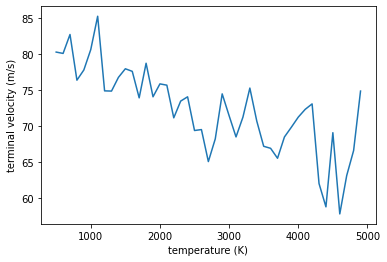

In [48]:
# plt.plot(Ts, gamma1s, label='First Order Model')
plt.plot(Ts, terminal_vs)
# plt.legend()
plt.xlabel("temperature (K)")
plt.ylabel("terminal velocity (m/s)")
plt.savefig("terminal_velocity_temperature.jpg")


## Radius Ratio

0.01
None
None
0.02
None
None
0.03
None
None
0.04
None
None
0.05
None
None
0.06
None
None
0.07
None
None
0.08
None
None
0.09
None
None
0.1
error 17064 ['time', 'final_velocity', 'density']
error 17467 ['time', 'final_velocity', 'density']
error 17038 ['time', 'final_velocity', 'density']
error 14911 ['time', 'final_velocity', 'density']
error 15189 ['time', 'final_velocity', 'density']
damping factor gamma in the first order situation : 0.12170093416227323
damping factor gamma in the second order situation : 0.0014811117375969963
The Mean Square Root Error of First Order Model : 19.389783414723823
The Mean Square Root Error of Second Order Model : 19.47471613870971
The first order model is more fitter than the second order model
0.12170093416227323
0.0014811117375969963
0.11
error 14672 ['time', 'final_velocity', 'density']
error 10352 ['time', 'final_velocity', 'density']
error 14344 ['time', 'final_velocity', 'density']
error 14221 ['time', 'final_velocity', 'density']
damping factor

Text(0.5, 0, 'Radius Ratio')

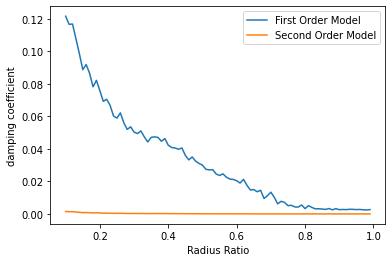

In [49]:
gamma1s = [] 
gamma2s = []
terminal_vs = []

RRs = list(map(lambda x : x/100, range(1, 100)))
for RR in RRs :
    print(RR)
    [g1, g2, terminal_v] = compare_models('result_RR', 'RR', RR)
    print(g1)
    print(g2)
    gamma1s.append(g1)
    gamma2s.append(g2)
    terminal_vs.append(terminal_v)

plt.plot(RRs, gamma1s, label='First Order Model')
plt.plot(RRs, gamma2s, label='Second Order Model')
plt.legend()
plt.ylabel("damping coefficient")
plt.xlabel("Radius Ratio")

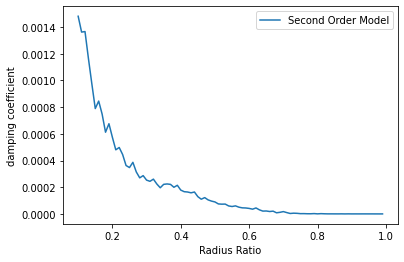

In [50]:
# plt.plot(Ts, gamma1s, label='First Order Model')
plt.plot(RRs, gamma2s, label='Second Order Model')
plt.legend()
plt.ylabel("damping coefficient")
plt.xlabel("Radius Ratio")
plt.savefig("damping coefficient_radius.jpg")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


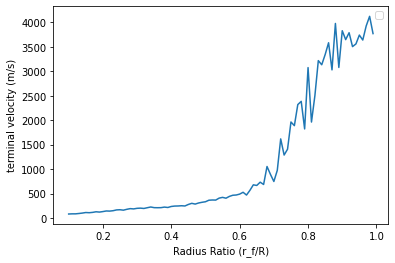

In [51]:
# plt.plot(Ts, gamma1s, label='First Order Model')
plt.plot(RRs, terminal_vs)
plt.legend()
plt.ylabel("terminal velocity (m/s)")
plt.xlabel("Radius Ratio (r_f/R)")
plt.savefig("terminal_velocity_radius.jpg")

## Density 

0.99
damping factor gamma in the first order situation : 0.5580226899724281
damping factor gamma in the second order situation : 0.031138932252406454
The Mean Square Root Error of First Order Model : 4.01134335074482
The Mean Square Root Error of Second Order Model : 4.055653210359546
The first order model is more fitter than the second order model
0.5580226899724281
0.031138932252406454
0.99
damping factor gamma in the first order situation : 0.5580226899724281
damping factor gamma in the second order situation : 0.031138932252406454
The Mean Square Root Error of First Order Model : 4.01134335074482
The Mean Square Root Error of Second Order Model : 4.055653210359546
The first order model is more fitter than the second order model
0.5580226899724281
0.031138932252406454
0.99
damping factor gamma in the first order situation : 0.5580226899724281
damping factor gamma in the second order situation : 0.031138932252406454
The Mean Square Root Error of First Order Model : 4.01134335074482
T

Text(0.5, 0, 'Density')

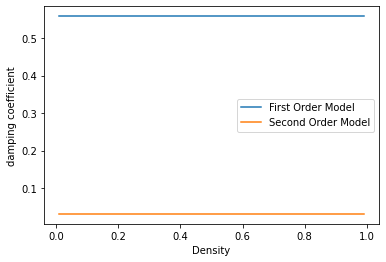

In [55]:
gamma1s = [] 
gamma2s = []
terminal_vs = []

Ds = list(map(lambda x : x/1000, range( 1, 100)))
for D in Ds :
    print(D)
    [g1, g2, terminal_v] = compare_models('result_D', 'D', D)
    print(g1)
    print(g2)
    gamma1s.append(g1)
    gamma2s.append(g2)
    terminal_vs.append(terminal_v)

plt.plot(RRs, gamma1s, label='First Order Model')
plt.plot(RRs, gamma2s, label='Second Order Model')
plt.legend()
plt.ylabel("damping coefficient")
plt.xlabel("Density")

In [ ]:
# plt.plot(Ts, gamma1s, label='First Order Model')
plt.plot(RRs, gamma2s, label='Second Order Model')
plt.legend()
plt.ylabel("damping coefficient")
plt.xlabel("Radius Ratio")
plt.savefig("damping coefficient_radius.jpg")

In [ ]:
# plt.plot(Ts, gamma1s, label='First Order Model')
plt.plot(RRs, terminal_vs)
plt.legend()
plt.ylabel("terminal velocity (m/s)")
plt.xlabel("Radius Ratio (r_f/R)")
plt.savefig("terminal_velocity_radius.jpg")

## Mass Ratios

0.01
None
None
0.11
damping factor gamma in the first order situation : 0.13293291975963623
damping factor gamma in the second order situation : 0.0017671161155821886
The Mean Square Root Error of First Order Model : 19.204081886084712
The Mean Square Root Error of Second Order Model : 19.07219268539853
The second order model is more fitter than the first order model
0.13293291975963623
0.0017671161155821886
0.21
damping factor gamma in the first order situation : 0.17921989540127997
damping factor gamma in the second order situation : 0.0032119770907645738
The Mean Square Root Error of First Order Model : 22.620524661602463
The Mean Square Root Error of Second Order Model : 22.68193902074551
The first order model is more fitter than the second order model
0.17921989540127997
0.0032119770907645738
0.31
damping factor gamma in the first order situation : 0.2625663245486159
damping factor gamma in the second order situation : 0.00689410747869691
The Mean Square Root Error of First Order 

Text(0.5, 0, 'Mass Ratio')

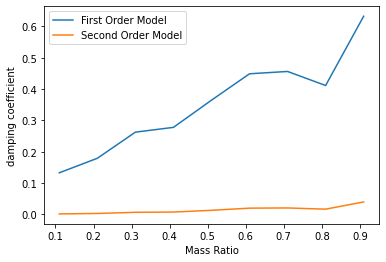

In [52]:
gamma1s = [] 
gamma2s = []
terminal_vs = []

MRs = list(map(lambda x : x/100, range(1, 100, 10)))
for MR in MRs :
    print(MR)
    [g1, g2, terminal_v] = compare_models('result_MR', 'MR', MR)
    print(g1)
    print(g2)
    gamma1s.append(g1)
    gamma2s.append(g2)
    terminal_vs.append(terminal_v)

plt.plot(MRs, gamma1s, label='First Order Model')
plt.plot(MRs, gamma2s, label='Second Order Model')
plt.legend()
plt.ylabel("damping coefficient")
plt.xlabel("Mass Ratio")

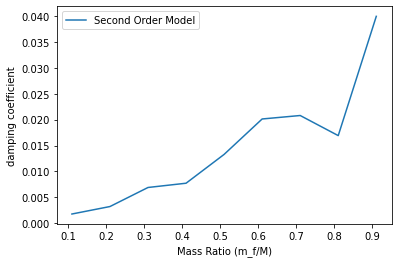

In [53]:
# plt.plot(Ts, gamma1s, label='First Order Model')
plt.plot(MRs, gamma2s, label='Second Order Model')
plt.legend()
plt.ylabel("damping coefficient")
plt.xlabel("Mass Ratio (m_f/M)")
plt.savefig("damping coefficient_mass.jpg")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


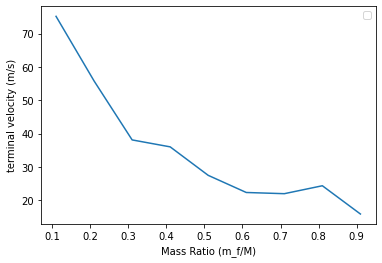

In [54]:
# plt.plot(Ts, gamma1s, label='First Order Model')
plt.plot(MRs, terminal_vs)
plt.legend()
plt.ylabel("terminal velocity (m/s)")
plt.xlabel("Mass Ratio (m_f/M)")